                            Challenge 2: Anticipating Household Displacement in Communities

Comparing differences in demographics among families experiencing high rent burden (vs not) organized by census tracts in LA County/surrounding areas

Data Sources:
San Francisco Eviction Notices - Accessed 9/27/2024 https://data.sfgov.org/Housing-and-Buildings/Eviction-Notices/5cei-gny5/about_data 

+ Clean the data
+ What are the major causes of eviction?
    - markers suggesting rent burden contributed?
+ How have the number and causes for eviction changed over time?

Future questions:
- What demographics are filed against most often? 
- What patterns are there between demographics and causes?
- Mapping by zipcode or block?
- Are most filings brought forth by single landlords or larger groups (ie. rental companies)?

[Further discussion on GH](https://github.com/datakind/datakit-housing-fall-2024/discussions/42)

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_raw = pd.read_csv(r'C:\Users\wisery\Data Science Projects\DataKind\Data SF\Eviction_Notices_20240927.csv', low_memory=False)

In [4]:
# The data about eviction reasons is beautiful, but everything beyond that (geodata, gueses at neighborhoods, supervising districts, etc.) is spotty
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46002 entries, 0 to 46001
Data columns (total 47 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Eviction ID                                           46002 non-null  object 
 1   Address                                               45988 non-null  object 
 2   City                                                  45999 non-null  object 
 3   State                                                 45999 non-null  object 
 4   Eviction Notice Source Zipcode                        45354 non-null  object 
 5   File Date                                             46002 non-null  object 
 6   Non Payment                                           46002 non-null  bool   
 7   Breach                                                46002 non-null  bool   
 8   Nuisance                                              46

In [5]:
data_raw.head(10)

,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,DELETE - Police Districts,DELETE - Supervisor Districts,DELETE - Fire Prevention Districts,DELETE - Zip Codes,"CBD, BID and GBD Boundaries as of 2017",Central Market/Tenderloin Boundary,"Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary Polygon - Updated,Fix It Zones as of 2018-02-07,Neighborhoods
0,M111223,1600 Block Of Oakland Avenue,San Francisco,CA,94124,07/26/2011,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M122019,1100 Block Of Bust Street,San Francisco,CA,94109,10/25/2012,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M130127,1000 Block Of 75th Avenue,San Francisco,CA,94122,01/22/2013,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M140187,1100 Block Of Bust Street,San Francisco,CA,94109,01/30/2014,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M140246,1100 Block Of Bust Street,San Francisco,CA,94109,02/06/2014,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,M140570,800 Block Of Downeypine Street,San Francisco,CA,94108,03/19/2014,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,E980597,2700 Block Of 27th Street,San Francisco,CA,NaN,03/24/1998,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E981318,NaN,San Francisco,CA,94122,06/16/1998,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,E981693,700 Block Of 49th Avenue,San Francisco,CA,94121,07/27/1998,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,E982496,200 Block Of New Street,San Francisco,CA,94112,10/23/1998,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [426]:
# Focusing on the eviction reasons & leaving behind all the messy data
eviction_reasons = data_raw.iloc[:,:24]
eviction_reasons


,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Demolition,Capital Improvement,Substantial Rehab,Ellis Act WithDrawal,Condo Conversion,Roommate Same Unit,Other Cause,Late Payments,Lead Remediation,Development
0,M111223,1600 Block Of Oakland Avenue,San Francisco,CA,94124,07/26/2011,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,M122019,1100 Block Of Bust Street,San Francisco,CA,94109,10/25/2012,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,M130127,1000 Block Of 75th Avenue,San Francisco,CA,94122,01/22/2013,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,M140187,1100 Block Of Bust Street,San Francisco,CA,94109,01/30/2014,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,M140246,1100 Block Of Bust Street,San Francisco,CA,94109,02/06/2014,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45997,M062571,3700 Block Of 26th Street,San Francisco,CA,94110,12/21/2006,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
45998,S000374,3000 Block Of Jackson Street,San Francisco,CA,94115,09/24/1997,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45999,S000294,300 Block Of Princeton Street,San Francisco,CA,94134,09/15/1997,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
46000,M080401,1700 Block Of Hyde Street,San Francisco,CA,94109,03/12/2008,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [93]:
# some of the evictions have multiple reasons for filing listed
eviction_reasons.iloc[10,6:24]

Non Payment                 True
Breach                     False
Nuisance                   False
Illegal Use                False
Failure to Sign Renewal    False
Access Denial              False
Unapproved Subtenant       False
Owner Move In              False
Demolition                 False
Capital Improvement        False
Substantial Rehab          False
Ellis Act WithDrawal       False
Condo Conversion           False
Roommate Same Unit         False
Other Cause                False
Late Payments               True
Lead Remediation           False
Development                False
Name: 10, dtype: object

In [8]:
eviction_dates = pd.to_datetime(eviction_reasons['File Date'])

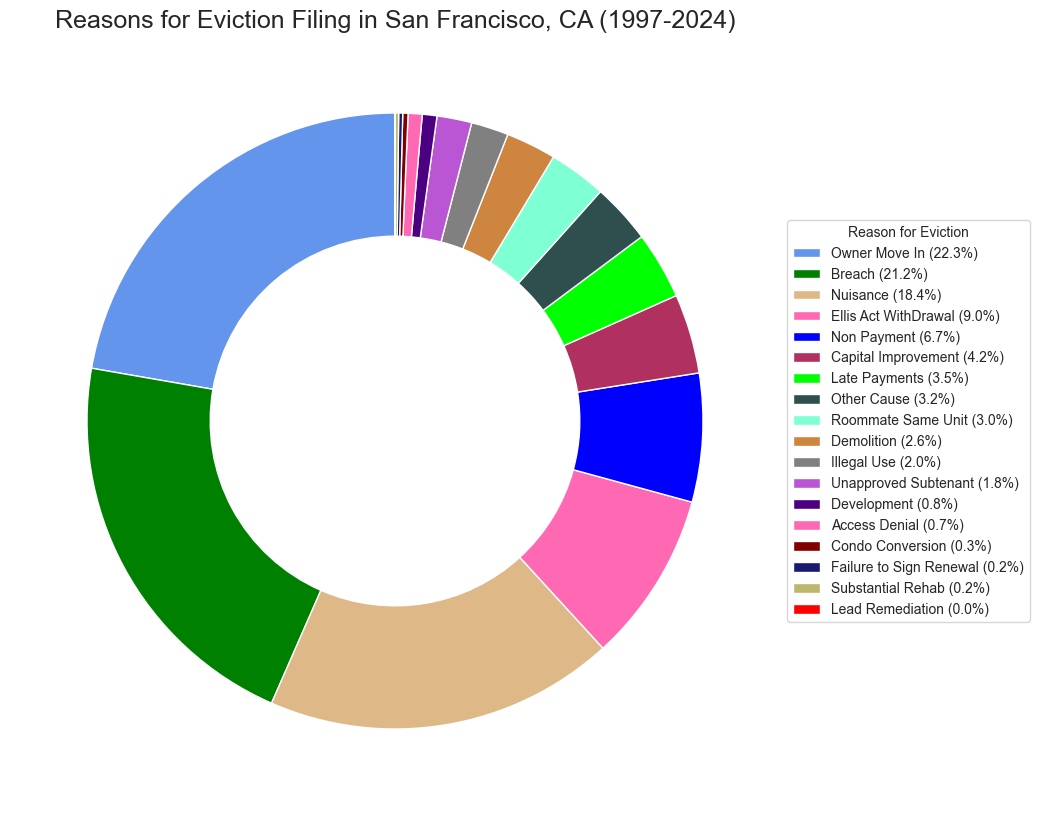

In [448]:
# Pie chart of reasons for eviction (over the entire time period)
# Calculate totals for each reason provided
labels = eviction_reasons.iloc[:, 6:24].columns
counts = [eviction_reasons[column].sum() for column in labels]

# Sort counts and labels in descending order for better visualization
sorted_indices = np.argsort(counts)[::-1]
sorted_counts = [counts[i] for i in sorted_indices]
sorted_labels = [labels[i] for i in sorted_indices]

# Calculate percentages for each reason
percentages = [count / sum(sorted_counts) * 100 for count in sorted_counts]

# Trying to find colors that are visually distinct without frying my retinas.
# I don't like any of the seaborn/matplotlib palettes for this many colors, but this tool helped: 
# https://mokole.com/palette.html
colors = [ #first colors match the stacked bar chart below
          '#6495ed', '#008000', '#DEB887', '#FF69B4', '#0000FF', '#B03060',
          '#00FF00', '#2F4F4F', '#7FFFD4', '#CD853F', '#808080', '#BA55D3', '#4B0082', '#ff69b4', 
          '#800000', '#191970', '#bdb76b', '#ff0000', '#ff8c00', '#ffd700', '#ba55d3', '#00ff7f', '#0000ff', '#f08080', '#adff2f', '#2e8b57', '#1e90ff', '#dda0dd', '#ff1493', '#87cefa', '#7fffd4', '#000000', ]

# Create donut-style pie chart and show percentages in the legend
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(sorted_counts, startangle=90, colors=colors, wedgeprops=dict(width=0.4))

# Adjust legend placement and appearance
ax.legend(wedges, [f'{label} ({percentages[i]:.1f}%)' for i, label in enumerate(sorted_labels)], title="Reason for Eviction", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set title 
ax.set_title("Reasons for Eviction Filing in San Francisco, CA (1997-2024)", fontsize=18)

plt.show()

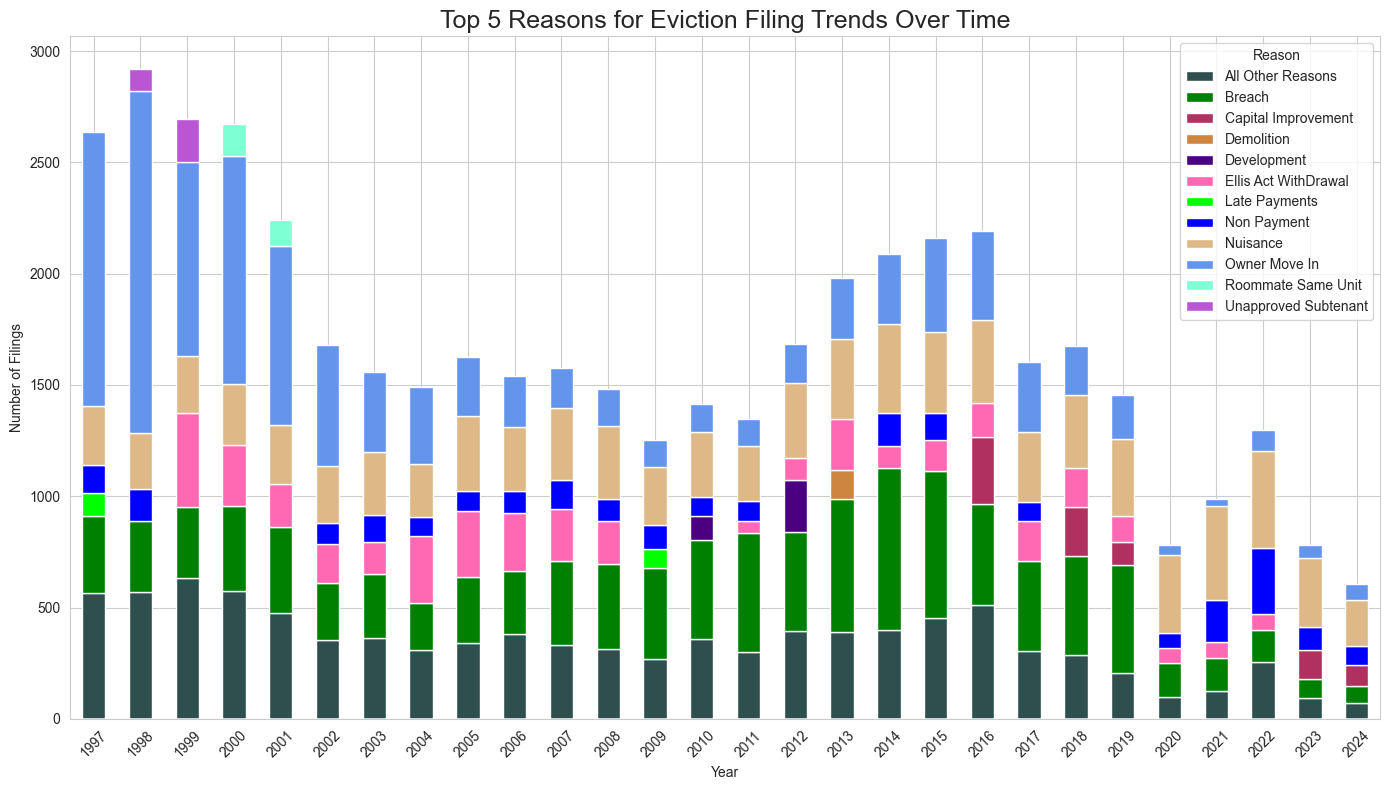

In [429]:
# Stacked bar chart of top 5 reasons for eviction filing over time

year_data = []
eviction_reasons['File Year'] = pd.to_datetime(eviction_reasons['File Date']).dt.year

# Going through the data for each year in the data set to identify the top 5 reasons & then combining all the other reasons (not in the top 5) into an "other" category so the viewer can see roughly what proportion of evictions are represented by the top 5 reasons vs all evictions
for year in range(eviction_reasons['File Year'].min(), eviction_reasons['File Year'].max()+1):
    per_year = eviction_reasons.loc[eviction_reasons['File Year'] == year]
    labels = per_year.iloc[:, 6:24].columns
    counts = [per_year[column].sum() for column in labels]
    
    # Sort counts and labels in descending order 
    sorted_indices = np.argsort(counts)[::-1]
    sorted_counts = [counts[i] for i in sorted_indices]
    sorted_labels = [labels[i] for i in sorted_indices]

    top_reasons = []
    other_count = 0
    
    # Top 5 reasons, excluding "Other Cause"
    for k,v in enumerate(sorted_labels):
        if v == "Other Cause":
            # Add "Other Cause" counts to the final 'Other' category
            other_count += sorted_counts[k]
        elif len(top_reasons) < 5:
            # Collect the top 5 reasons (excluding "Other Cause")
            top_reasons.append((v, sorted_counts[k]))
        else:
            # Sum all remaining reasons into "Other"
            other_count += sorted_counts[k]

    # Add top 5 reasons to the data
    for reason, count in top_reasons:
        year_data.append({
            'Year': year,
            'Reason': reason,
            'Count': count
        })
    
    # Add the aggregated "Other" category
    year_data.append({
        'Year': year,
        'Reason': 'All Other Reasons',
        'Count': other_count
    }) 

# putting that sorted info into its own dataframe
df_year_data = pd.DataFrame(year_data)

# Pivot data for stacked bar chart
pivot_df = df_year_data.pivot_table(index='Year', columns='Reason', values='Count', aggfunc='sum', fill_value=0)

# Trying to find colors that are visually distinct without frying my retinas.
# I don't like any of the seaborn/matplotlib palettes for this many colors, but this tool helped: 
# https://mokole.com/palette.html
colors = ['#2f4f4f', '#008000', '#b03060', '#cd853f', '#4b0082',  '#ff69b4', '#00ff00', '#0000ff', '#deb887', '#6495ed', '#7fffd4', '#ba55d3']

# Plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.plot(kind='bar', stacked=True, ax=ax, color = colors)

# Labels & title
ax.set_title('Top 5 Reasons for Eviction Filing Trends Over Time', fontsize = 18)
ax.set_ylabel('Number of Filings')
ax.set_xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
